In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Importing the data

In [30]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [31]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# Checking for missing values

In [32]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
data.drop(columns=['Loan_ID'],inplace=True)

In [34]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [35]:
data['target']=data['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)

In [36]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  target  
0         Urban           Y       1  
1         Rural           N       0  
2         Urban           Y       1  
3         Urban           Y       1  
4         Urban           Y       1

# Plot showing target distribution across Gender and Education

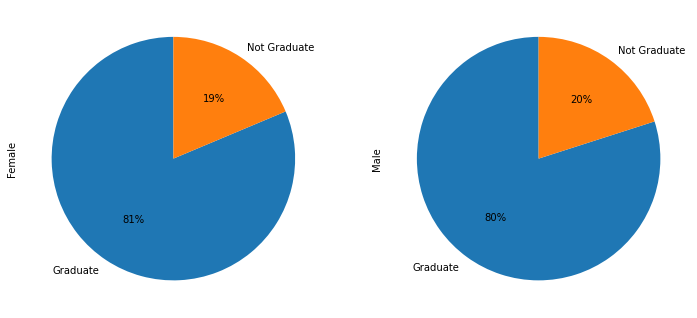

In [37]:
data.groupby(['Gender','Education'])['target'].sum().unstack('Gender').plot(kind='pie',autopct='%1.0f%%',
                                                                              startangle=90,figsize=(12,8),legend=False,subplots=True)
plt.show()

# Plot showing target distribution across education and Married 

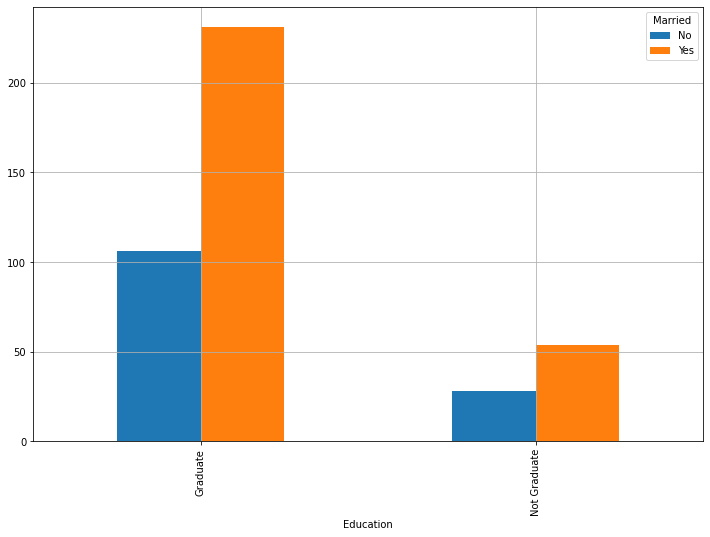

In [38]:
data.groupby(['Education','Married'])['target'].sum().unstack('Married').plot(kind='bar',grid=True,figsize=(12,8))
plt.show()

# Plot showing target distribution across Employment and Property_area

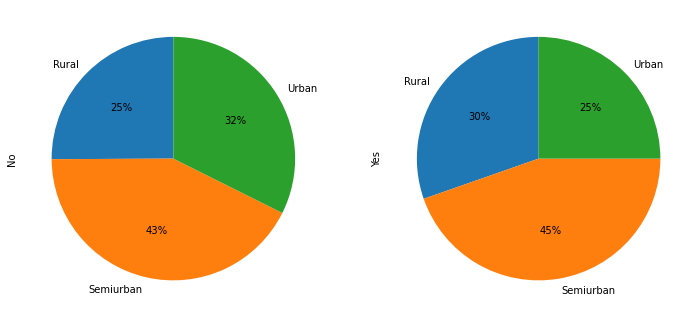

In [39]:
data.groupby(['Self_Employed','Property_Area'])['target'].sum().unstack('Self_Employed').plot(kind='pie',
                                                                                             startangle=90,autopct='%1.0f%%',
                                                                                             legend=False,subplots=True,figsize=(12,8))
plt.show()

In [40]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  target  
0         Urban           Y       1  
1         Rural           N       0  
2         Urban           Y       1  
3         Urban           Y       1  
4         Urban           Y       1

In [41]:
x=data.drop(columns=['Loan_Status','target'])
y=data['target']

In [42]:
cat_feat=[i for i in x.columns if x[i].dtype=='O']
cont_feat=[i for i in x.columns if x[i].dtype!='O']

In [43]:
cat_feat_with_miss=[i for i in cat_feat if x[i].isnull().sum()>0]
cont_feat_with_miss=[i for i in cont_feat if x[i].isnull().sum()>0]

In [44]:
param={'imputer__strategy':['median','mean','mode']}

In [45]:
pipe=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler()),('model',LogisticRegression())])

In [46]:
grid=GridSearchCV(pipe,cv=5,scoring='accuracy',param_grid=param)

In [47]:
grid.fit(x[cont_feat_with_miss],y)

C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'imputer__strategy': ['median', 'mean', 'mode']},
             scoring='accuracy')

In [48]:
grid.best_params_

{'imputer__strategy': 'median'}

# Imputing the continueous variables with median value

In [49]:
sm=SimpleImputer(strategy='median')

In [50]:
x[cont_feat_with_miss]=sm.fit_transform(x[cont_feat_with_miss])

# Imputing the categorical values with most frequent values

In [51]:
sm=SimpleImputer(strategy='most_frequent')

In [52]:
x[cat_feat]=sm.fit_transform(x[cat_feat])

In [53]:
x.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban

In [54]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
from feature_engine.encoding import MeanEncoder
from sklearn.metrics import accuracy_score

In [56]:
x['target']=y

In [57]:
mm=MeanEncoder(variables=cat_feat)

In [58]:
x[cat_feat]=mm.fit_transform(x[cat_feat],x['target'])

In [59]:
x.head()

Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.691235  0.629108    0.686111   0.708333       0.687970             5849   
1  0.691235  0.718204    0.647059   0.708333       0.687970             4583   
2  0.691235  0.718204    0.686111   0.708333       0.682927             3000   
3  0.691235  0.718204    0.686111   0.611940       0.687970             2583   
4  0.691235  0.629108    0.686111   0.708333       0.687970             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  target  
0       0.658416       1  
1       0.614525       0  
2       0.658416       1  
3       0.658416       1  
4       0.658416       1

# Scaling the data

In [60]:
scaler=StandardScaler()

In [61]:
x[cont_feat]=scaler.fit_transform(x[cont_feat])

In [62]:
x.head()

Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.691235  0.629108    0.686111   0.708333       0.687970         0.072991   
1  0.691235  0.718204    0.647059   0.708333       0.687970        -0.134412   
2  0.691235  0.718204    0.686111   0.708333       0.682927        -0.393747   
3  0.691235  0.718204    0.686111   0.611940       0.687970        -0.462062   
4  0.691235  0.629108    0.686111   0.708333       0.687970         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231        0.411733   
1          -0.038732   -0.211241          0.273231        0.411733   
2          -0.554487   -0.948996          0.273231        0.411733   
3           0.251980   -0.306435          0.273231        0.411733   
4          -0.554487   -0.056551          0.273231        0.411733   

   Property_Area  target  
0       0.658416       1  
1       0.614525       0  
2       0.658416       1  
3       0.658416       1  
4       0.658416       1

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [64]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    report=classification_report(y_pred,y_test)
    return score,report

In [65]:
logis_score,report=Prediction(LogisticRegression(),x_train,x_test,y_train,y_test)

# Final Accuracy

In [66]:
logis_score

1.0

In [67]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       122

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

